# Preprocessing
- get the data
- split it to train,validation,train sets 

In [ ]:
##google colab
from google.colab.patches import cv2_imshow
from google.colab import files
from google.colab import drive

####
import pandas as pd
import numpy as np
import io
from matplotlib import pyplot as plt
%matplotlib inline
import pandas as pd
import numpy as np
import keras
import cv2
import subprocess
import os
import time
import math

#dl
import tensorflow as tf
from tensorflow.keras import layers, models, callbacks
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
!ls

sample_data


In [ ]:
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [ ]:
cd /content/drive/My Drive/diplrad/projekt

/content/drive/My Drive/diplrad/projekt


In [ ]:
'''
All in one for python script

def load_fer2013():
    """Load the emotion dataset"""
    if not os.path.exists("data/raw"):
        print("Downloading the face emotion dataset...")
        subprocess.check_output(
            "curl -SL https://www.dropbox.com/s/opuvvdv3uligypx/fer2013.tar | tar xz", shell=True)
    print("Loading dataset...")
    data = pd.read_csv("data/raw/fer2013.csv")

    train_data = data[data['Usage'] == "Training"]
    valid_data = data[data['Usage'] == "PublicTest"]
    test_data = data[data['Usage'] == "PrivateTest"]
    

    return train_data, valid_data, test_data

def getFeatures(data,width=48, height=48):

    X = []
    pixels = data['pixels'].tolist()
    for pixel_sequence in pixels:
        face = np.asarray(pixel_sequence.split(
            ' '), dtype=np.uint8).reshape(width, height)
        face = cv2.resize(face.astype('uint8'), (width, height))
        X.append(face.astype('float32'))

    X = np.asarray(X)
    X = np.expand_dims(X, -1)
    y = pd.get_dummies(data['emotion']).values


    return X,y

train_data, valid_data, test_data = load_fer2013()


X_train,y_train = getFeatures(train_data)
X_val,y_val = getFeatures(valid_data)
X_test,y_test = getFeatures(test_data)


print(X_train.shape, X_val.shape, X_test.shape)
print(y_train.shape,y_val.shape,y_test.shape)

'''

In [ ]:
def load_fer2013():
    """Load the emotion dataset"""
    if not os.path.exists("data/raw"):
        print("Downloading the face emotion dataset...")
        subprocess.check_output(
            "curl -SL https://www.dropbox.com/s/opuvvdv3uligypx/fer2013.tar | tar xz", shell=True)
    print("Loading dataset...")
    data = pd.read_csv("data/raw/fer2013.csv")

    train_data = data[data['Usage'] == "Training"]
    valid_data = data[data['Usage'] == "PublicTest"]
    test_data = data[data['Usage'] == "PrivateTest"]
    
    print('Done!')
    return train_data, valid_data, test_data

In [ ]:
def getFeatures(data):

    width, height = 48, 48
    X = []
    pixels = data['pixels'].tolist()
    for pixel_sequence in pixels:
        #print(len(pixel_sequence))
        face = np.asarray(pixel_sequence.split(
            ' '), dtype=np.uint8).reshape(width, height)
        #print(len(face))
        face = cv2.resize(face.astype('uint8'), (width, height))
        X.append(face.astype('float32'))

    X = np.asarray(X)
    X = np.expand_dims(X, -1)
    y = pd.get_dummies(data['emotion']).values

    print('Done!')
    return X,y

In [ ]:
train_data.head()

In [ ]:
train_data, valid_data, test_data = load_fer2013()

Loading dataset...
Done!


In [ ]:
train_data.count()

emotion    28709
pixels     28709
Usage      28709
dtype: int64

In [ ]:
valid_data.count()

emotion    3589
pixels     3589
Usage      3589
dtype: int64

In [ ]:
test_data.count()

emotion    3589
pixels     3589
Usage      3589
dtype: int64

In [ ]:
X_train,y_train = getFeatures(train_data)

Done!


In [ ]:
X_train /= 255.

In [ ]:
X_val,y_val = getFeatures(valid_data)

Done!


In [ ]:
X_val /=255.

In [ ]:
X_test,y_test = getFeatures(test_data)

Done!


In [ ]:
X_test /= 255.

In [ ]:
print(X_train.shape, X_val.shape, X_test.shape)

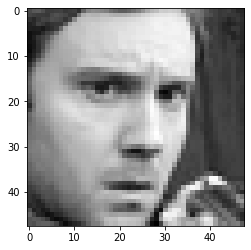

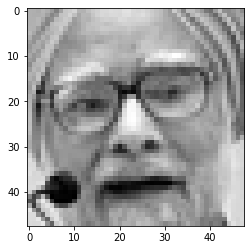

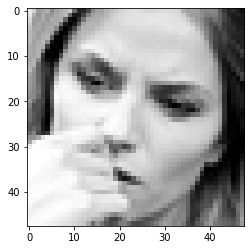

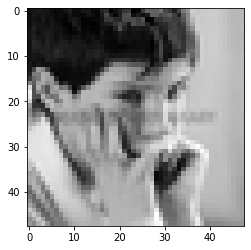

In [ ]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(X_train[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [ ]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(X_val[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

In [ ]:
for ix in range(4):
    plt.figure(ix)
    plt.imshow(X_test[ix].reshape((48, 48)), interpolation='none', cmap='gray')
plt.show()

# Image segmentation

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
                            featurewise_center=False,
                            featurewise_std_normalization=False,
                            rotation_range=10,
                            width_shift_range=0.1,
                            height_shift_range=0.1,
                            zoom_range=0.1,
                            horizontal_flip=True)

# Training

In [ ]:
input_shape = (48, 48, 1)
num_classes = 7
batch_size=128
epochs = 150


SGD_LEARNING_RATE = 0.01
SGD_DECAY = 0.001

sgd = keras.optimizers.SGD(learning_rate=SGD_LEARNING_RATE,momentum=0.9, decay=SGD_DECAY, nesterov=True)
adam = keras.optimizers.Adam(learning_rate = 0.01)

Callbacks

In [ ]:
if os.path.isdir('utils'):
    print('Directory already exists!')
else:
  !mkdir utils

Directory already exists!


In [ ]:
!ls

data  models  utils


In [ ]:
'''
if os.path.isdir('CLR'):
  print('Already downloaded')
else:
  !git clone https://github.com/bckenstler/CLR.git
  print('\nCLR downloaded!\n')

if os.path.isdir('LRFinder'):
  print('Already downloaded')
else:
  !git clone https://github.com/WittmannF/LRFinder.git
  print('\nLRFinder downloaded!\n')


from CLR.clr_callback import CyclicLR
from LRFinder.keras_callback import LRFinder
'''



##### Tried Cyclic Training but was not promising.

"\nif os.path.isdir('CLR'):\n  print('Already downloaded')\nelse:\n  !git clone https://github.com/bckenstler/CLR.git\n  print('\nCLR downloaded!\n')\n\nif os.path.isdir('LRFinder'):\n  print('Already downloaded')\nelse:\n  !git clone https://github.com/WittmannF/LRFinder.git\n  print('\nLRFinder downloaded!\n')\n\n\nfrom CLR.clr_callback import CyclicLR\nfrom LRFinder.keras_callback import LRFinder\n"

## Baseline model

In [ ]:
'''
tf.keras.utils.plot_model(
    model,
    to_file="model.png",
    show_shapes=False,
    show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
'''
from keras.utils import plot_model

In [ ]:
def BaselineModel():
    
    #Model Initialization
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))


    
    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))

    
    model.add(layers.Conv2D(128, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), padding='same', activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D(pool_size=(2, 2)))
    model.add(layers.Dropout(0.2))
    
    
    
    #Flattening
    model.add(layers.Flatten())
    
    #Adding fully connected layer
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.BatchNormalization())
    #Adding Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))
     
    return model

In [ ]:
plot_model(baseModel,show_shapes=True, expand_nested=True)

In [ ]:
baseModel = BaselineModel()


In [ ]:
baseModel.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_8 (Conv2D)            (None, 48, 48, 32)        320       
_________________________________________________________________
batch_normalization_10 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_8 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 24, 24, 64)        18496     
_________________________________________________________________
batch_normalization_11 (Batc (None, 24, 24, 64)        256       
_________________________________________________________________
max_pooling2d_9 (MaxPooling2 (None, 12, 12, 64)       

In [ ]:
baseModel.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])

# CALLBACKS

In [ ]:
cp_filepath='models/Baseline-weights-best_adam.hdf5'

rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='max',factor=0.5, patience=6, min_lr=0.00001, verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint(cp_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [rlrop,checkpoint]

# TRAINING

### Class weight

In [ ]:
from sklearn.utils import class_weight

y_train_decoded = decode_one_hot(y_train)
y_train_decoded = np.array(y_train_decoded)

class_weights = class_weight.compute_class_weight('balanced',
                                                    np.unique(y_train_decoded),
                                                    y_train_decoded)

print(sum(class_weights))


class_weight = {
    0:class_weights[0], 
    1:class_weights[1], 
    2:class_weights[2], 
    3:class_weights[3],
    4:class_weights[4],
    5:class_weights[5],
    6:class_weights[6]
}

print(class_weight)


14.971247999387797
{0: 1.0266046844269623, 1: 9.406618610747051, 2: 1.0010460615781582, 3: 0.5684387684387684, 4: 0.8491274770777877, 5: 1.293372978330405, 6: 0.8260394187886635}


In [ ]:
history_baseline_adam = baseModel.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs,
    callbacks = callbacks_list,
    #class_weight = class_weights, 
    validation_data=(X_val, y_val))

In [ ]:
baseModel.evaluate(X_test,y_test,batch_size=128)

29/29 [==============================] - 0s 6ms/step - loss: 0.9262 - accuracy: 0.6626


[0.9262048602104187, 0.662580132484436]

In [ ]:
def decode_one_hot(batch_of_vectors):
  """Computes indices for the non-zero entries in batched one-hot vectors.

  Args:
    batch_of_vectors: A Tensor with length-N vectors, having shape [..., N].
  Returns:
    An integer Tensor with shape [...] indicating the index of the non-zero
    value in each vector.
  """
  nonzero_indices = tf.where(tf.not_equal(
      batch_of_vectors, np.zeros_like(batch_of_vectors)))
  reshaped_nonzero_indices = tf.reshape(
      nonzero_indices[:, -1], tf.shape(batch_of_vectors)[:-1])
  return reshaped_nonzero_indices

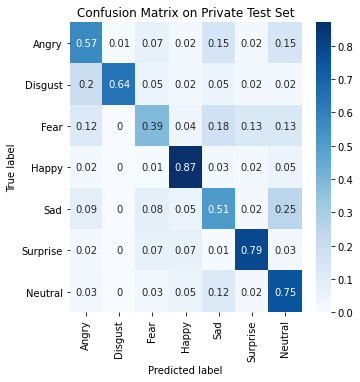

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}

y_pred = baseModel.predict(X_test).argmax(axis=1)
y_true = decode_one_hot(y_test)

cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=emotions.values(), 
  columns=emotions.values()
  )

plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Private Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

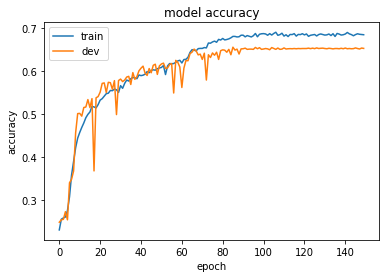

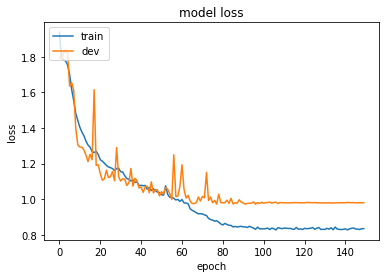

In [ ]:
plt.plot(history_baseline_adam.history['accuracy'])
plt.plot(history_baseline_adam.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_baseline_adam.history['loss'])
plt.plot(history_baseline_adam.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

### TEST TIME AUGMENTATION

working on it

In [ ]:
from sklearn.metrics import accuracy_score
# configure image data augmentation
datagen = ImageDataGenerator(horizontal_flip=True)

# make a prediction using test-time augmentation
def tta_prediction(datagen, model, image, n_examples):
	# convert image into dataset
    samples = np.expand_dims(image, 0)
    print(samples.shape)
	# prepare iterator
    it = datagen.flow(samples, batch_size=n_examples)
    # make predictions for each augmented image
    yhats = model.predict_generator(it, steps=n_examples, verbose=1)
    # sum across predictions
    summed = np.sum(yhats, axis=0)
    # argmax across classes
    return np.argmax(summed)
 
 # evaluate a model on a dataset using test-time augmentation
def tta_evaluate_model(model, testX, testY):
  # configure image data augmentation
  datagen = ImageDataGenerator(horizontal_flip=True)
  # define the number of augmented images to generate per test set image
  n_examples_per_image = 7
  yhats = list()
  #print(testX.shape)
  for i in range(len(testX)):
    # make augmented prediction
    print(testX[i].shape)
    yhat = tta_prediction(datagen, model, testX[i], n_examples_per_image)
    # store for evaluation
    yhats.append(yhat)
  # calculate accuracy
  testY_labels = np.argmax(testY, axis=1)
  acc = accuracy_score(testY_labels, yhats)
  return acc

In [ ]:
print('\n# Evaluate on test data')
TTA_results_test = tta_evaluate_model(baseModel, X_test, y_test)
print('test loss, test acc:', results_test)
print('TTA test acc:', TTA_results_test)

### SECOND BASELINE MODEL

In [ ]:
def baselineModel2():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes,activation='softmax'))
    #model.add(layers.Dense(num_classes,activation='softmax'))

    return model

In [ ]:
baseModel2 = baselineModel2() 


In [ ]:
baseModel2.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=sgd,
              metrics=['accuracy'])

In [ ]:
cp_filepath='models/BaselineV2-weights-best_sgd.hdf5'


rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='max',factor=0.5, patience=7, min_lr=0.00001, verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint(cp_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [rlrop,checkpoint]

In [ ]:
history_base2 = baseModel2.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = epochs,
    callbacks = callbacks_list,
    #class_weight = class_weight, 
    validation_data=(X_val, y_val))

Epoch 1/150
225/225 [==============================] - ETA: 0s - loss: 2.1303 - accuracy: 0.2387
Epoch 00001: val_accuracy improved from -inf to 0.26247, saving model to models/BaselineV2-weights-best_sgd.hdf5
225/225 [==============================] - 8s 34ms/step - loss: 2.1303 - accuracy: 0.2387 - val_loss: 1.8362 - val_accuracy: 0.2625
Epoch 2/150
224/225 [============================>.] - ETA: 0s - loss: 1.7111 - accuracy: 0.3282
Epoch 00002: val_accuracy improved from 0.26247 to 0.32823, saving model to models/BaselineV2-weights-best_sgd.hdf5
225/225 [==============================] - 7s 31ms/step - loss: 1.7107 - accuracy: 0.3283 - val_loss: 1.7120 - val_accuracy: 0.3282
Epoch 3/150
224/225 [============================>.] - ETA: 0s - loss: 1.6163 - accuracy: 0.3680
Epoch 00003: val_accuracy improved from 0.32823 to 0.35302, saving model to models/BaselineV2-weights-best_sgd.hdf5
225/225 [==============================] - 7s 31ms/step - loss: 1.6157 - accuracy: 0.3682 - val_loss

In [ ]:
baseModel2.evaluate(X_test,y_test)

113/113 [==============================] - 0s 4ms/step - loss: 0.9557 - accuracy: 0.6528


[0.9556638598442078, 0.6528280973434448]

In [ ]:
from tensorflow.keras.models import load_model

baseline2_best = load_model('models/BaselineV2-weights-best_sgd.hdf5')

#baseline2_best.evaluate(X_test,y_test, batch_size=1)

3589/3589 [==============================] - 12s 3ms/step - loss: 0.9564 - accuracy: 0.6545


[0.9564176201820374, 0.654499888420105]

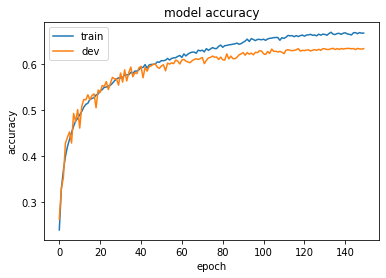

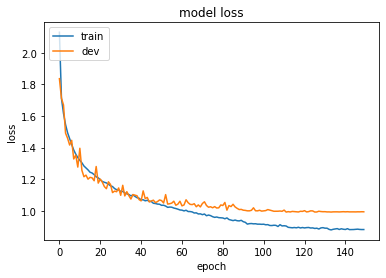

In [ ]:
plt.plot(history_base2.history['accuracy'])
plt.plot(history_base2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_base2.history['loss'])
plt.plot(history_base2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

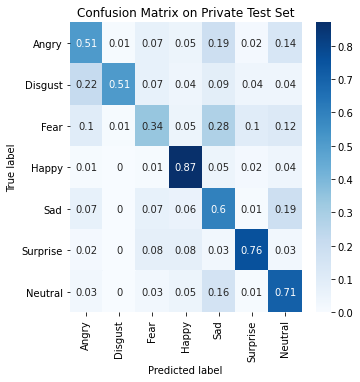

In [ ]:
y_pred = baseModel2.predict(X_test).argmax(axis=1)
y_true = decode_one_hot(y_test)

cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=emotions.values(), 
  columns=emotions.values()
  )

plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Private Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

In [ ]:
cp_filepath='models/BaselineM5-weights-best.hdf5'

rlrop = keras.callbacks.ReduceLROnPlateau(monitor='val_accuracy',mode='max',factor=0.5, patience=6, min_lr=0.00001, verbose=1)
checkpoint = keras.callbacks.ModelCheckpoint(cp_filepath, monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
callbacks_list = [rlrop,checkpoint]

In [ ]:
def baselineModel3Mask():
    model = models.Sequential()
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.2))

    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(64, (5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.3))

    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.Conv2D(32, (5, 5), activation='relu', padding='same'))
    model.add(layers.BatchNormalization())
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Dropout(0.4))

    model.add(layers.Flatten())
    model.add(layers.Dense(512, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dense(256, activation='relu'))
    model.add(layers.BatchNormalization())
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(num_classes,activation='softmax'))
    #model.add(layers.Dense(num_classes,activation='softmax'))

    return model

In [ ]:
baselineM5 = baselineModel3Mask()
baselineM5.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_12 (Conv2D)           (None, 48, 48, 32)        832       
_________________________________________________________________
batch_normalization_16 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
conv2d_13 (Conv2D)           (None, 48, 48, 32)        25632     
_________________________________________________________________
batch_normalization_17 (Batc (None, 48, 48, 32)        128       
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 24, 24, 32)        0         
_________________________________________________________________
dropout_8 (Dropout)          (None, 24, 24, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 24, 24, 64)       

In [ ]:
baselineM5.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=adam,
              metrics=['accuracy'])

In [ ]:
history_base3 = baselineM5.fit(
    datagen.flow(X_train, y_train, batch_size=batch_size),
    steps_per_epoch=int(np.ceil(X_train.shape[0] / float(batch_size))),
    epochs = 100,
    callbacks = callbacks_list,
    #class_weight = class_weight, 
    validation_data=(X_val, y_val))

Epoch 1/100
225/225 [==============================] - ETA: 0s - loss: 2.0024 - accuracy: 0.2263
Epoch 00001: val_accuracy did not improve from 0.56980
225/225 [==============================] - 18s 82ms/step - loss: 2.0024 - accuracy: 0.2263 - val_loss: 1.7814 - val_accuracy: 0.2614
Epoch 2/100
225/225 [==============================] - ETA: 0s - loss: 1.8135 - accuracy: 0.2759
Epoch 00002: val_accuracy did not improve from 0.56980
225/225 [==============================] - 18s 80ms/step - loss: 1.8135 - accuracy: 0.2759 - val_loss: 1.7273 - val_accuracy: 0.3118
Epoch 3/100
225/225 [==============================] - ETA: 0s - loss: 1.6882 - accuracy: 0.3344
Epoch 00003: val_accuracy did not improve from 0.56980
225/225 [==============================] - 18s 80ms/step - loss: 1.6882 - accuracy: 0.3344 - val_loss: 1.5222 - val_accuracy: 0.4043
Epoch 4/100
225/225 [==============================] - ETA: 0s - loss: 1.5554 - accuracy: 0.3952
Epoch 00004: val_accuracy did not improve from 0

In [ ]:
baselineM5.evaluate(X_test,y_test, batch_size=batch_size)



29/29 [==============================] - 1s 17ms/step - loss: 0.8850 - accuracy: 0.6790


[0.8850268125534058, 0.6790192127227783]

In [ ]:
!ls

data  models  utils


In [ ]:
from tensorflow.keras.models import load_model

baselineM5_best = load_model('models/BaselineM5-weights-best.hdf5')

#baselineM5_best.evaluate(X_test,y_test, batch_size=batch_size)

In [ ]:
baselineM5_best.evaluate(X_test,y_test, batch_size=128)

29/29 [==============================] - 0s 8ms/step - loss: 0.8815 - accuracy: 0.6843


[0.8814541101455688, 0.684313178062439]

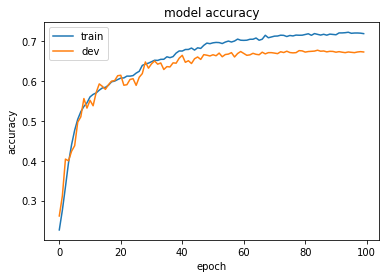

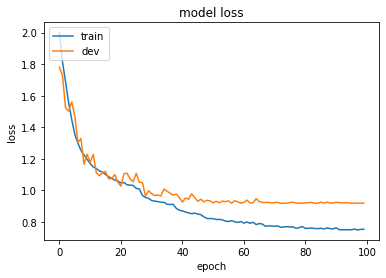

In [ ]:
plt.plot(history_base3.history['accuracy'])
plt.plot(history_base3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(history_base3.history['loss'])
plt.plot(history_base3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'dev'], loc='upper left')
plt.show()

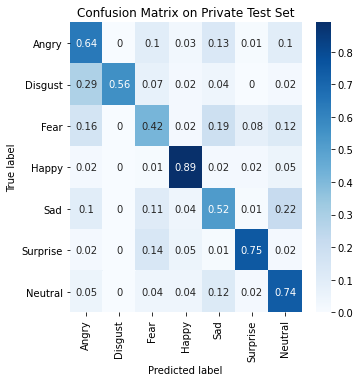

In [ ]:
from sklearn.metrics import confusion_matrix
from seaborn import heatmap

emotions = {0:'Angry', 1:'Disgust', 2:'Fear', 3:'Happy', 4:'Sad', 5:'Surprise', 6:'Neutral'}
y_pred = baselineM5.predict(X_test).argmax(axis=1)
y_true = decode_one_hot(y_test)


cmat_df_test=pd.DataFrame(
  confusion_matrix(y_true, y_pred, normalize='true').round(2),
  index=emotions.values(), 
  columns=emotions.values()
  )

plt.figure(figsize=(5,5))
heatmap(cmat_df_test,annot=True,cmap=plt.cm.Blues)
plt.tight_layout()
plt.title('Confusion Matrix on Private Test Set')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()